# **Modelización y predicción de series temporales financieras mediante análisis de sentimientos y Machine Learning.**


Trabajo Realizado Por: Hugo Fernández Camba, Diego Moreno Cortés-Cavanillas, Alberto Cañuelo Gómez.



A lo largo de la asignatura Aprendizaje Automático del Doble Grado en Economía - Matemáticas y Estadística, hemos estudiado múltiples modelos para extraer la máxima cantidad de información de un conjunto de datos, con la finalidad de construir herramientas que nos permitan predecir la pertenencia a una clase o el valor de una cierta variable, para una observación inédita. Nuestro primer objetivo, por tanto, es demostrar funcionamiento y utilidad práctica de algunas de las principales familias de modelos.

Además, también deseábamos afianzar el sustancial conocimiento adquirido en lo relativo a métodos y usos en programación. Con esta finalidad, exploramos prácticamente todos los recursos y librerías con los que nos hemos familiarizados a lo largo del curso, así como algunas de las estructuras más notorias, como son los Pipelines.

Sin embargo, nuestra intención con este trabajo no es solamente reforzar y demostrar lo aprendido durante el curso y en las clases, sino emplear dicha experiencia como palanca para adentrarnos en temáticas más complejas en el ámbito de Machine Learning. En primer lugar, deseábamos explorar el estudio de esta disciplina a datos en Series Temporales, que constituyen un volumen masivo de información de enorme riqueza en la economía moderna. En particular, por nuestra formación complementaria como economistas, hemos centrado nuestras atenciones en datos de índole financiera, como son el precio de múltiples activos financieros.

En la mayoría de casos de estudio práctico a lo largo del curso han predominado fuentes de datos puramente cuantitativos, si bien en las clases teóricas sí se ha estudiado la aplicación de Machine Learning, y en particular de Deep Learning, a datos textuales y gráficos. Con el presente trabajo hemos intentado adentrarnos también en los primeros, a través del análisis de sentimientos en titulares de noticias o textos cortos (tweets). El análisis realizado se limita a textos directamente relacionados con los activos financieros que son objeto de nuestro estudio, y emplea métodos estructurados para extraer una medida del 'sentimiento' en torno a los mismos. Dejamos para futuros proyectos el desarrollo de métodos de análisis directo de texto, con herramientas más exhaustivas y customizables, como algoritmos de vectorización, y un sujeto de estudio más amplio, como puedan ser textos, y no solamente titulares, de noticias de múltiples medios y que no se refieran directamente al activo, pero que puedan guardar cualquier relación con el mismo.


# Índice del Trabajo:

1.   Introducción.
      - Metodología
      - Librerías y recursos empleados
      - Datasets
2.   Extracción de información textual.
      - Scrapping: idea y métodos
      - Scrapping en Finviz.
      - Scrapping en Google News
3.   Construcción de nuestra base de datos principal
      - Extracción de información en Twitter.
      - Análisis de Sentimientos: puntuación mediante Vader.
      - Datos financieros: yfinance.
      - Extracción de características financieras.
      - Fusión de variables de sentimiento y financieras.
4.   Exploratory Data Analysis
      - Analisis de los sentimientos.
      - Analisis de variables financieras.
      - Modelización mediante Series Temporales.
5.   Clasificación
      - Adaptación de la base de datos al problema de clasificación.
      - Pipelines: estimación de múltiples modelos
      - Optimización mediante TSCV.
      - Resultados
6.   Regresión
      - Adaptación de la base de datos al problema de regresión.
      - Pipelines: estimación conjunta de modelos.
      - Long-Short Term Memory models.
      - Optimización de mejores modelos y resultados.
7.   Conclusiones: resultados, futuros pasos y aplicaciones.
8.   Fuentes y bibliografía


# Introducción


## Metodología

Siguiendo la estructura del índice anterior, nuestra metodología para el presenta trabajo ha consistidos en lo siguiente. En primer lugar, hemos estudiado con detalle el problema del análisis de sentimientos y las herramientas disponibles para ello en Python. También hemos buscado información relativa al tratamiento de datos de series temporales, a aplicaciones de Machine Learning en finanzas, y naturalmente a la intersección de ambos campos. 

Tras reunir el conocimiento suficiente en cuanto a las herramientas necesarias y óptimas para nuestro problema, nuestra atención se posó sobre la obtención de las bases de datos y de la información necesaria para realizar un análisis básico sobre los mismos que nos sirva para nuestro análisis. Para ello, realizamos un trabajo exhaustivo sobre diversas técnicas de scrapping, con múltiples sujetos de las mismas. Pese a las múltiples complicaciones que se detallan en su momento, en este script se presenta un par de estas técnicas implementadas. Sin embargo, la dimensión y tipología de estos algoritmos no es sufiente a nuestros ojos para llevar a cabo un trabajo de previsión con garantías, por lo que proseguimos a formar una base de datos adecuada mediante la fusión de información financiera y de texto obtenidas por terceros.

Con estos pasos preliminares, empleamos una metodología eminentemente práctica en la implantación del análisis exploratorio y de los modelos fundamentales, muchos de ellos tratados en clase, para clasificación y regresión. Desarrollamos el código originalmente, apoyándonos en los conocimientos de teoría del Aprendizaje Automático, y de prácticas de programación para el mismo. Se resuelven las dudas mediante herramientas de IA y sobre todo haciendo uso de posts en StackOverflow. Realizamos un análisis cualitativo de nuestros resultados, basado en nuestra experiencia previa en este tipo de proyectos, evaluando su validez y utilidad mediante las métricas y algoritmos habituales.


## Librerías y recursos empleados

Como hemos mencionado, para este trabajo hemos empleado un gran número de librerías ya conocidas y aplicadas en clase, pero también hemos explorado nuevos métodos para tareas habituales. Evidentemente, para aquellas acciones relativas a análisis y manejo de textos, series temporales y similares hemos empleado recursos y librerías nuevos para nosotros, que nos permitieran realizar las acciones precisas. 

Algunas de las librerías necesarias con las siguientes:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,cross_val_score, train_test_split
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os

# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Clasificación
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Datasets

La información que vamos a emplear se obtiene en nuestro caso de dos fuentes distintas, en función del tipo de datos. En el caso de los datos financieros, empleamos la librería Yahoo Finance (yfinance) a partir de la cual construímos diversas métricas financieras de utilidad para la predicción de la evolución futura de la acción. 

Para las variables textuales, sin embargo, hemos estudiado un número mucho mayor de posibilidades, fundamentalmente en lo relativo a la obtención mediante scrapping de titulares o tweets. A lo largo de dicho proceso se han dado numerosos problemas debidos fundamentalmente a la deprecación de funciones, a cambios en la estructura de ciertas webs que complican su navegación, a la necesidad de nociones más avanzadas de programación en lenguages web y sobre todo debido a un déficit en nuestras capacidades de poder de computación con las herramientas disponibles. Por ese motivo, y pese a que demostramos algunos de los métodos que nos han resultado menos problemáticos, tomamos la decisión de emplear para el core de nuestro análisis una base de datos de texto de terceros, que nos proporcionase un volumen mayor de información tanto cronológica como entrópicamente. Nos hemos inclinado por la base disponible en:  

https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020

Nuestra intención original consistía en emplear herramientas de scrapping para obtener una base similar por nuestros propios medios, incorporando también noticias del sector y de la economía general, de modo que pudieramos, en instantes futuros, realizar un análisis con vectorización de textos. Sin embargo, la reciente decisión de Elon Musk de privar de acceso a Twitter a las múltiples APIs externas que servían a este fin nos ha forzado a tomar las decisiones previamente señaladas. 

# Extracción de información textual


##  Scrapping: ideas y métodos

La idea fundamental de los métodos de scrapping es relativamente sencilla: iterar sobre el contenido de una cierta dirección URL para leer, extraer y grabar en un nuevo archivo una serie de entradas repetitivas con la información contenida en dicha web. Sin embargo, en la práctica esta es una tarea compleja, que exige el empleo de algoritmos de manejo de texto sofisticados para identificar las diversas categorías de información, de modo que la información grabada se presente de forma ordenada. Este es uno de los problemas experimentados en nuestra investigación, y que conduce al empleo de una base de datos al uso, no generada por nosotros mismos.

Para obtener esta información, por tanto, es preciso recurrir a algunas librerías especializadas. Algunas de las que empleamos para nuestros ejemplos son: 

from urllib.request import urlopen, Request

from bs4 import BeautifulSoup

import os




Introducción...


In [ ]:
# para importar la base de datos desde google drive ya que pesa mas de 300MB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import tweets
tweets = pd.read_csv('/content/drive/MyDrive/trabajo_ml/Tweet.csv',engine='python', encoding='utf-8', error_bad_lines=False)
company_tweet = pd.read_csv('/content/drive/MyDrive/trabajo_ml/Company_Tweet.csv')

tweets=tweets.merge(company_tweet,how='left',on='tweet_id')
# format dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

In [ ]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05
...,...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21
4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37
4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37


In [ ]:
tweets.describe()

,tweet_id,post_date,comment_num,retweet_num,like_num
count,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06,4.336445e+06
mean,8.834282e+17,1.499461e+09,2.923863e-01,6.347647e-01,2.103625e+00
std,1.927735e+17,4.596080e+07,1.885788e+00,6.986371e+00,1.371744e+01
min,5.504415e+17,1.420070e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.185450e+17,1.460149e+09,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.825934e+17,1.499262e+09,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.054776e+18,1.540313e+09,0.000000e+00,0.000000e+00,1.000000e+00
max,1.212160e+18,1.577837e+09,6.310000e+02,9.990000e+02,9.990000e+02


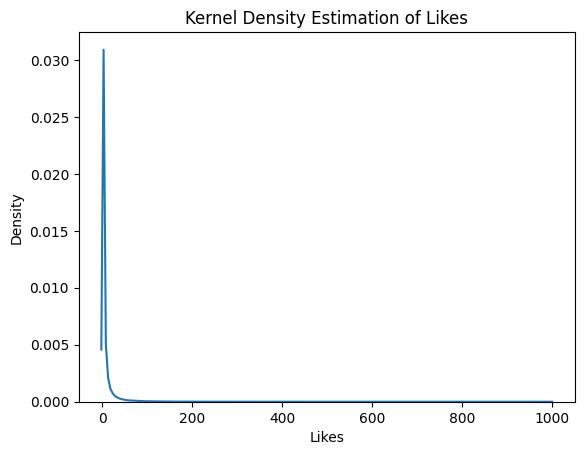

In [ ]:
sns.kdeplot(tweets.like_num)
plt.xlabel('Likes')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Likes')
plt.show()

In [ ]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

## Sentiment Intensity Analyzer
función SIA ara medir la intensidad de los tweets, importado desde la librería VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

# Veamos como funciona la función SIA para extraer la información y opinión del tweet
print(tweets.body[1676153])
sia.polarity_scores(tweets.body[1676153])

$TSLA + FANG stocks getting absolutely destroyed. Rough day for tech. :(


{'neg': 0.415, 'neu': 0.585, 'pos': 0.0, 'compound': -0.7501}

In [ ]:
print(tweets.body[573014])
sia.polarity_scores(tweets.body[573014])

Large Outflow of Money Witnessed in Google Inc. $GOOG http://bit.ly/1E6OJoC


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
def get_sentiment(tweets,ticker='TSLA',start='2017-01-01',end='2017-02-01'):
    #sbuset
    df=tweets.loc[((tweets.ticker_symbol==ticker)&(tweets.date>=start)&(tweets.date<=end))]
    # applt the SentimentIntensityAnalyzer
    df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
    # create label
    #bins= pd.interval_range(start=-1, freq=3, end=1)
    df.loc[:,('sentiment')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])
    df.loc[:, 'ticker'] = ticker

    df=df.loc[:,["date","score","sentiment","tweet_id","body",'ticker']]
    return df

In [ ]:
get_sentiment(tweets,ticker='TSLA',start='2017-01-01',end='2017-02-01')

,date,score,sentiment,tweet_id,body,ticker
1786176,2017-01-01,0.0000,neutral,815352552204238848,"$TSLA""I continue to believe that it’s the mark...",TSLA
1786180,2017-01-01,0.5984,good,815354565142937600,Baird analyst Ben Kallo is closing the year on...,TSLA
1786181,2017-01-01,0.0000,neutral,815355389877354497,$TSLAKallo rates Tesla’ stock an ‘Outperform’ ...,TSLA
1786187,2017-01-01,-0.5267,neutral,815364373438930945,"With #Tesla and #SolarCity combined, fossil fu...",TSLA
1786194,2017-01-01,0.0000,neutral,815369598358781952,"$IBM Financials Updated Saturday, December 31,...",TSLA
...,...,...,...,...,...,...
1863946,2017-02-01,0.1779,neutral,826936895829585922,These assets are seeing a jump in tweets $CMG ...,TSLA
1863955,2017-02-01,0.0000,neutral,826938171783053312,Here's a list of 14 stocks that are already up...,TSLA
1863965,2017-02-01,0.0000,neutral,826940688138919938,Here's a list of 14 stocks that are already up...,TSLA
1863968,2017-02-01,0.6597,good,826940848692621312,Commented on The Tesla Self-Driving Dreams Are...,TSLA


In [ ]:
# ampliamos el vocabulario con palabras relacionadas con sentimientos en los mercados financieros

positive_words= 'buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit win growth optimistic opportunity advantage success wealth bullish gains positive prosper rich advancement boom exciting promising increase improve appreciate lucrative potential strong best excellent outperform'
negative_words=  'sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold miss resistance squeeze cover seller loss decline negative crash risk downtrend slump volatility concern downgrade fear worry deteriorate dip decrease weak collapse uncertain problem bearish deficit struggle worst disaster underperform outflow'
dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)


In [ ]:
print(tweets.body[573014])
sia.polarity_scores(tweets.body[573014])

Large Outflow of Money Witnessed in Google Inc. $GOOG http://bit.ly/1E6OJoC


{'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'compound': -0.7184}

In [ ]:
# para importar más de una compañía
#tweets_df=[]
#for company in ['AAPL', 'TSLA']:
 # tweets_df.append(get_sentiment(tweets,ticker=company,start='2018-01-01',end='2019-12-31'))

#tweets_df

In [ ]:
tweets_aapl=get_sentiment(tweets,ticker='AAPL',start='2015-01-01',end='2019-12-31')
tweets_aapl

# tarda bastante porque hay muchos tweets para APPLE y va palabra a palabra

,date,score,sentiment,tweet_id,body,ticker
0,2015-01-01,0.0000,neutral,550441509175443456,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL
1,2015-01-01,-0.8271,bad,550441672312512512,Insanity of today weirdo massive selling. $aap...,AAPL
4,2015-01-01,0.0000,neutral,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
6,2015-01-01,0.0000,neutral,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
8,2015-01-01,0.0000,neutral,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
...,...,...,...,...,...,...
4336437,2019-12-31,0.8481,good,1212159254884433921,Imagine calling your broker-dealer and wanting...,AAPL
4336438,2019-12-31,0.7574,good,1212159275637886976,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL
4336439,2019-12-31,-0.3382,neutral,1212159765914079234,That $SPY $SPX puuump in the last hour was the...,AAPL
4336442,2019-12-31,0.0000,neutral,1212160410692046849,I don't discriminate. I own both $aapl and $ms...,AAPL


In [ ]:
tweets_aapl_final = tweets_aapl.groupby(['ticker', 'date']).agg(tweet_volume=('score', 'count'), sentiment_score=('score', 'mean')).reset_index()
tweets_aapl_final

,ticker,date,volume,score
0,AAPL,2015-01-01,299,0.149022
1,AAPL,2015-01-02,867,0.112948
2,AAPL,2015-01-03,346,0.297905
3,AAPL,2015-01-04,406,0.239043
4,AAPL,2015-01-05,1147,0.161437
...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814
1815,AAPL,2019-12-28,210,0.157038
1816,AAPL,2019-12-29,190,0.163587
1817,AAPL,2019-12-30,732,0.244986


# Scrapping de información de las noticias 

In [ ]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

#tickers_dict = {'AMZN': 5, 'TSLA': 1, 'GOOG': 3, 'META': 3, 'KO': 10, 'PEP': 5,  # amazon, tesla, google, meta, coke, pepsi
#                'BA': 5, 'XOM': 5, 'CVX': 4, 'UNH': 1, 'JNJ': 3, 'JPM': 3, # boeing, exxon mobil, chevron, united health, johnson&johnson, jp morgan
#                'BAC': 5, 'C': 5, 'SPG': 10, 'AAPL': 6, 'MSFT': 5, 'WMT': 6, # bank of america, citigroup, simon property group, apple, microsoft, walmart
#                'LMT': 2, 'PFE': 10, 'MMM': 3, 'CRWD': 3, 'WBD': 20, 'DIS': 8, # lockheed martin, pfizer, 3M, crowdstrike, warner bros, disney
#                'AIG': 5, 'BRK-B': 4, 'DDOG': 3, 'SLB': 16, 'SONY': 5, 'PLD': 5, # american international group, berkshire hathaway, datadog, schlumberger, sony, prologis
#                'INT': 16, 'AMD': 5, 'ISRG': 3, 'INTC': 5} # world fuel services, advanced micro devices, intuitive surgical, intel
                
#tickers = tickers_dict.keys()

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [ ]:
# Read one single day of headlines for ‘AMZN’ 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
 # Read the text of the element ‘a’ into ‘link_text’
 a_text = table_row.a.text
 # Read the text of the element ‘td’ into ‘data_text’
 td_text = table_row.td.text
 # Print the contents of ‘link_text’ and ‘data_text’ 
 print(a_text)
 print(td_text)
 # Exit after printing 4 rows of data
 if i == 3:
  break

Amazon is doing too much & needs to re-focus: Analyst
Jun-07-23 03:52PM
Amazon Considers Ad-Supported Prime Video Tier, WSJ Says
03:51PM
Amazon plans ad-supported streaming tier amid race for profitability: Report
03:21PM
Stock market winners in 2023 are last year's losers
02:40PM


In [ ]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.get_text()
        # split text in the td tag into a list 
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Remove the date and time from the beginning of the text
        if len(date_scrape) >= 1:
            text_start_index = len(' '.join(date_scrape))
            text = text[text_start_index:]
        
        # Extract the source website from the headline if available
        source_website = ''
        if '(' in text and ')' in text:
            start_index = text.index('(')
            end_index = text.index(')')
            source_website = text[start_index+1:end_index]
            text = text[:start_index] + text[end_index+1:]
        
        # Append ticker, date, time, text, and source_website as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text, source_website])
        
parsed_news[:5]  # print first 5 rows of news

[['AAPL',
  'Jun-07-23',
  '03:37PM',
  'Screen Of The Day: Fund Managers Soak Up Apple, Microsoft, Walmart',
  "Investor's Business Daily"],
 ['AAPL',
  'Jun-07-23',
  '03:25PM',
  'Apple Investor Focus Shifts To iPhone 15 Introduction After Headset Debut',
  "Investor's Business Daily"],
 ['AAPL',
  'Jun-07-23',
  '02:40PM',
  "Stock market winners in 2023 are last year's losers",
  'Yahoo Finance'],
 ['AAPL',
  'Jun-07-23',
  '02:16PM',
  'Apple Will Finally Allow Your Text Messages To Make Ducking Sense',
  'TheStreet.com'],
 ['AAPL',
  'Jun-07-23',
  '02:00PM',
  "6 Thoughts on Apple's Impressive-But-Expensive Vision Pro Headset",
  'TheStreet.com']]

In [ ]:
# Ya hemos introducido SIA en el apartado anterior y le hemos ampliado el vocabulario
sia = SentimentIntensityAnalyzer()
# ampliamos el vocabularios con palabras relacionadas con sentimientos en los mercados financieros

positive_words= 'buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding high profit win growth optimistic opportunity advantage success wealth bullish gains positive prosper rich advancement boom exciting promising increase improve appreciate lucrative potential strong best excellent outperform'
negative_words=  'sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold miss resistance squeeze cover seller loss decline negative crash risk downtrend slump volatility concern downgrade fear worry deteriorate dip decrease weak collapse uncertain problem bearish deficit struggle worst disaster underperform outflow'
dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)

# Set column names
columns = ['ticker', 'date', 'time', 'headline', 'source']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(sia.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()

NameError: ignored

# Datos sobre los mercados

Usamos la librería yfinance para exportar datos de la API de Yahoo!Finance

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Tickers de las compañias
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

# importante coger más fechas en en los tweets para que los indicadores no aparezcan como nan
end = datetime(2019, 12, 31)
start = datetime(2014, 1, 1)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]
ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

for company, com_name, ticker in zip(company_list, company_name, ticker_list):
    company["company_name"] = com_name
    company["ticker"] = ticker
    
stocks_df = pd.concat(company_list, axis=0)
stocks_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076138,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954018,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000,TESLA,TSLA
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,TESLA,TSLA
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,TESLA,TSLA


In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076138,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954018,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355141,98572000,APPLE,AAPL
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421059,48478800,APPLE,AAPL
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL


In [ ]:
# convertimos las fechas en una columna
stocks_df.reset_index(inplace=True)
stocks_df.rename(columns={'index': 'Date'}, inplace=True)
stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076138,412610800,APPLE,AAPL
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954018,317209200,APPLE,AAPL
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...,...
7540,2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000,TESLA,TSLA
7541,2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500,TESLA,TSLA
7542,2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500,TESLA,TSLA
7543,2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500,TESLA,TSLA


## Indicadores y nuevas variables

In [ ]:
# Calcular indicadores: MA, MACD, RSI, EWMA
prices=stocks_df.copy()
# format date
prices['Date'] = pd.to_datetime(prices['Date'], format="%Y-%m-%d").dt.date.astype('datetime64[ns]')
prices=prices.sort_values(by=['Date']).reset_index()
# rename date column for consistency
prices=prices.rename(columns={"Date": "date"})

def create_indicators(data):
    
    prices = data.sort_values(by=['date']).reset_index()

    # create simple moving average
    n=[5,10,200,300]
    for i in n:
        prices.loc[:,(str("MA"+str(i)))]=prices['Close'].rolling(i).mean()    

    # Calculate MACD  
    day26=prices['Close'].ewm(span=26, adjust=False).mean()
    day12=prices['Close'].ewm(span=12, adjust=False).mean()
    prices.loc[:,('macd')]=day12-day26 
    prices.loc[:,('signal')]=prices['macd'].ewm(span=9, adjust=False).mean()

    # Calculate RSI 
    up = np.log(prices.Close).diff(1)
    down = np.log(prices.Close).diff(1)

    up[up<0]=0
    down[down>0]=0

    # Calculate the EWMA
    roll_up = up.ewm(span=14).mean()
    roll_down = down.abs().ewm(span=14).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up / roll_down
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    prices.loc[:,('rsi')]=RSI1

    return prices

# create dict, by ticker
d = dict(tuple(prices.groupby('ticker')))
d = {k:create_indicators(v) for k, v in d.items()}

def subset_prices(d,ticker,start,end):
    x=d[ticker]
    x=x[((x.date>=start)&(x.date<=end))]
    return x

In [ ]:
final_stocks_df=create_indicators(prices)
final_stocks_df

,level_0,index,date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker,MA5,MA10,MA200,MA300,macd,signal,rsi
0,0,0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,1,1509,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082,GOOGLE,GOOG,NaN,NaN,NaN,NaN,0.635739,0.127148,100.000000
2,2,3018,2014-01-02,37.349998,37.400002,37.099998,37.160000,31.420715,30632200,MICROSOFT,MSFT,NaN,NaN,NaN,NaN,1.879303,0.477579,100.000000
3,3,4527,2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000,AMAZON,AMZN,NaN,NaN,NaN,NaN,1.455203,0.673104,44.874188
4,4,6036,2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000,TESLA,TSLA,22.908779,NaN,NaN,NaN,0.317255,0.601934,26.396185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,7542,1508,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191582,144114400,APPLE,AAPL,67.021298,75.673183,79.294991,77.243741,-1.397698,-0.405108,50.153073
7541,7543,6035,2019-12-30,93.699997,94.199997,92.030998,92.344498,92.344498,73494000,AMAZON,AMZN,79.751797,78.105633,79.441686,77.367540,-0.322121,-0.388510,52.817487
7542,7540,4526,2019-12-30,158.990005,159.020004,156.729996,157.589996,152.490112,16348400,MICROSOFT,MSFT,97.750897,86.616882,79.785471,77.841055,5.729007,0.834993,58.584813
7543,7541,3017,2019-12-30,67.500000,67.650002,66.700996,66.806999,66.806999,21018000,GOOGLE,GOOG,96.622298,90.424649,80.014533,77.609478,3.162683,1.300531,47.767225


## Análisis gráfico sobre los mercados (revisar nombre de las variables)


In [ ]:
# Precios de cierre
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(final_stocks_df, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

NameError: ignored

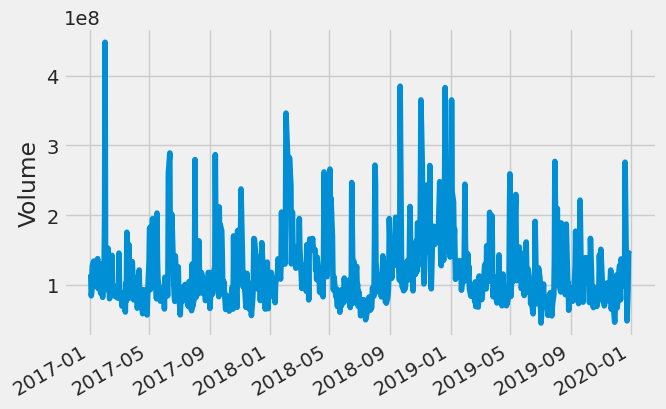

In [ ]:
# Volumen de ventas
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tech_list[i - 1]}")
    
plt.tight_layout()

Indicadores técnicos de los mercados

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

fig.tight_layout()

In [ ]:
# average daily return
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

fig.tight_layout()

In [ ]:
# HISTOGRAMA AVERAGE DAILY RETURN
plt.figure(figsize=(15, 18))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Análisis gráfico

In [ ]:
#!pip install mplfinance

In [ ]:
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import seaborn as sns

import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

import datetime
from datetime import date, timedelta

In [ ]:
# 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    Japanese candlestick chart showing OHLC prices for a specified time period
    
    :param dat: pandas dataframe object with datetime64 index, and float columns "Open", "High", "Low", and "Close"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    :returns: a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.style.use('seaborn-whitegrid')
    plt.title(f"Candlestick chart of {txt}", color = 'black', fontsize = 20)
    plt.xlabel('Date', color = 'black', fontsize = 15)
    plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
 
    plt.show()

In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,ticker
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076138,412610800,APPLE,AAPL
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954018,317209200,APPLE,AAPL
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600,APPLE,AAPL
...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355141,98572000,APPLE,AAPL
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421059,48478800,APPLE,AAPL
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL


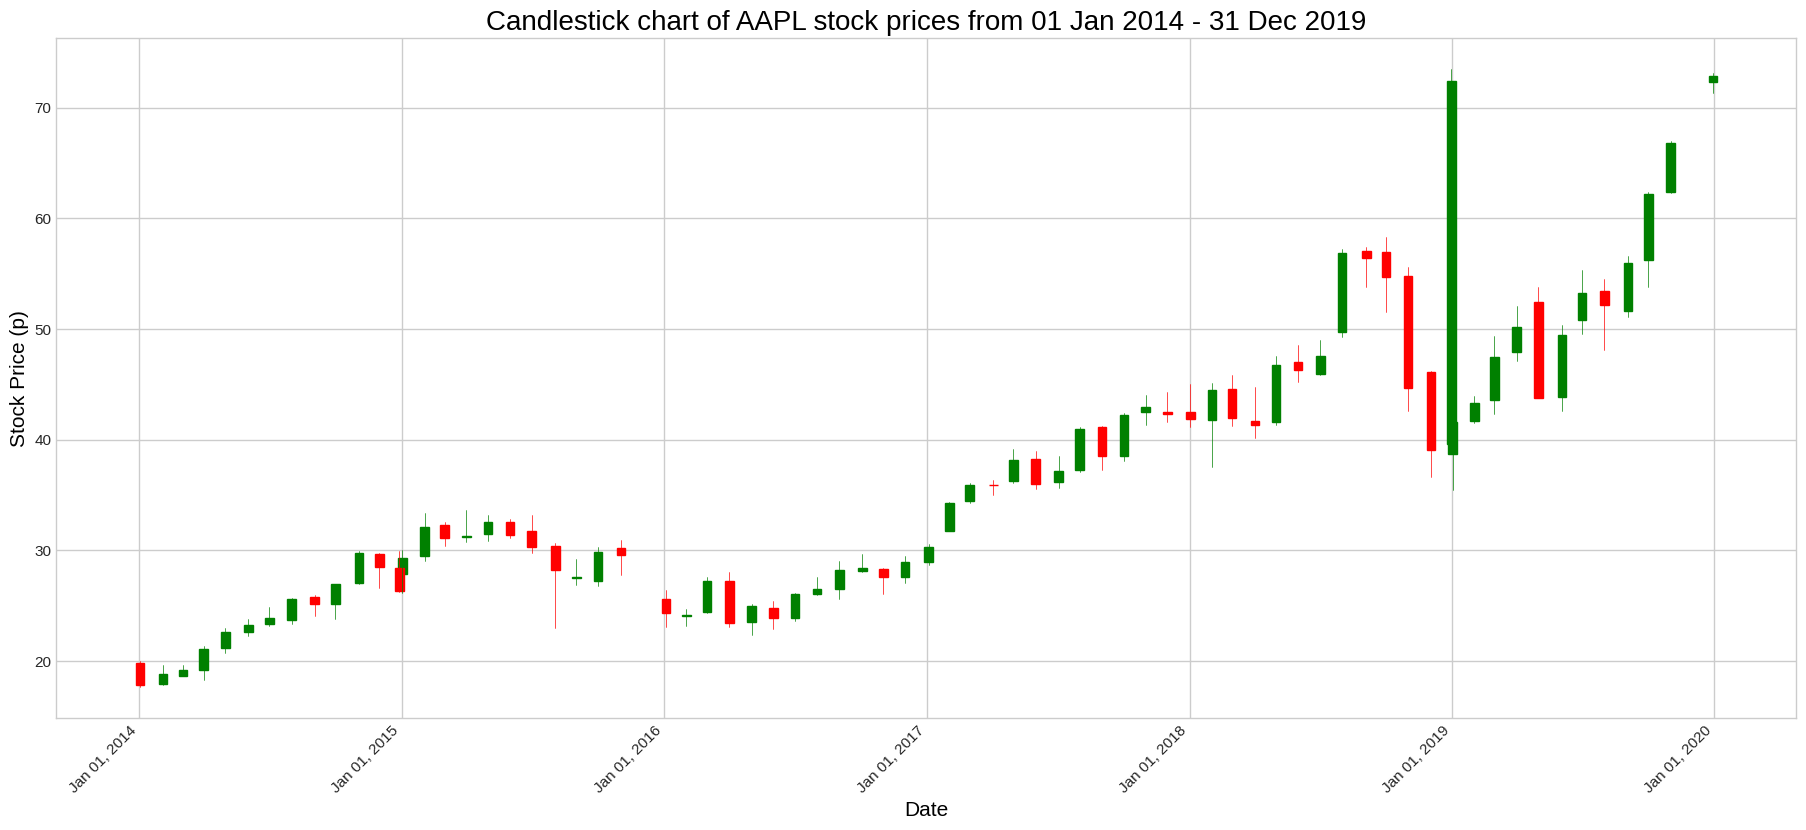

In [ ]:
txt = "AAPL stock prices from 01 Jan 2014 - 31 Dec 2019"

pandas_candlestick_ohlc(AAPL, stick="month")

In [ ]:
def sma2():
  plt.figure(figsize=(15,9))
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=5).mean().plot(label='5 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=10).mean().plot(label='20 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].rolling(window=200).mean().plot(label='200 Day Avg')
  AAPL['Adj Close'].loc['2014-01-01':'2019-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

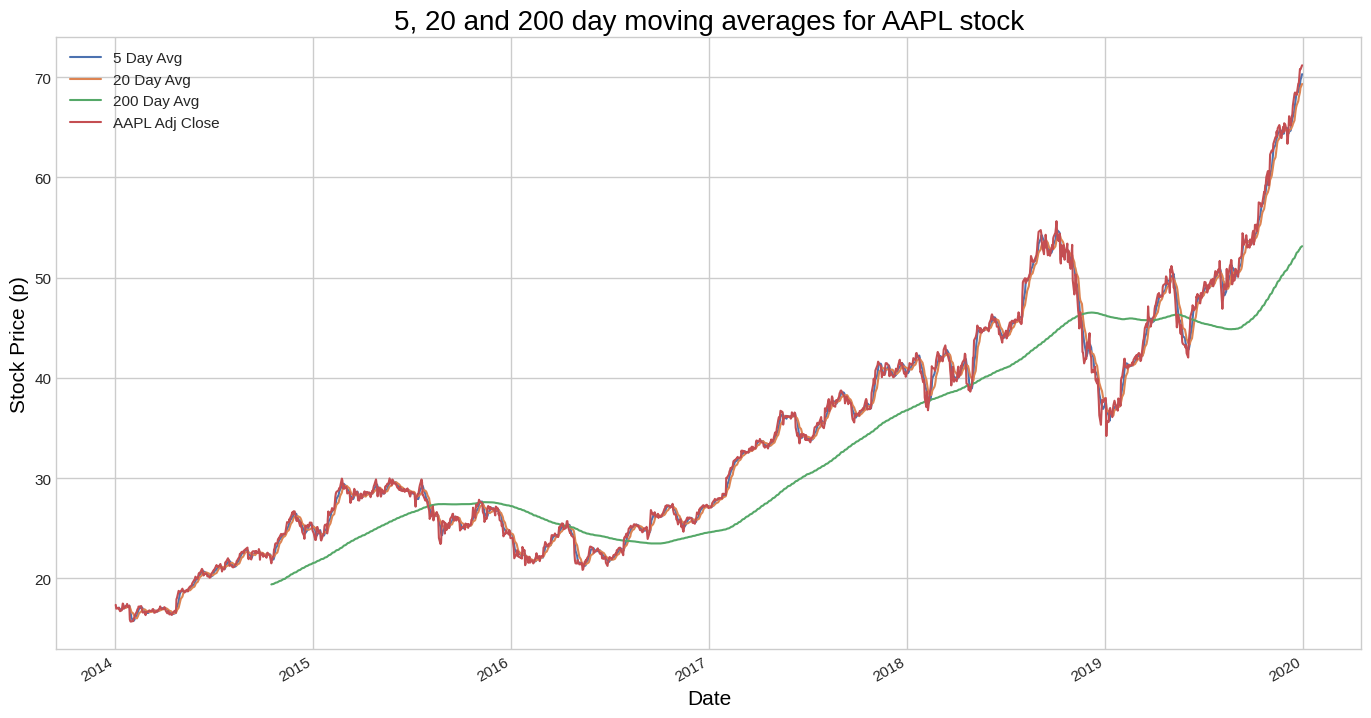

In [ ]:
title_txt = "5, 20 and 200 day moving averages for AAPL stock"
label_txt = "AAPL Adj Close"

sma2()

# Base Final unida

In [ ]:
final_stocks_df[final_stocks_df['ticker'] == 'AAPL']

,level_0,index,date,Open,High,Low,Close,Adj Close,Volume,company_name,ticker,MA5,MA10,MA200,MA300,macd,signal,rsi
0,0,0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364958,234684800,APPLE,AAPL,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
8,8,1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983524,392467600,APPLE,AAPL,22.716245,NaN,NaN,NaN,1.008051,0.990823,47.734065
14,11,2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076138,412610800,APPLE,AAPL,22.573253,22.641149,NaN,NaN,0.311484,0.487890,49.163684
18,18,3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954018,317209200,APPLE,AAPL,24.677979,22.680075,NaN,NaN,1.058911,0.815960,47.601417
23,23,4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600,APPLE,AAPL,19.061590,21.869785,NaN,NaN,-0.365454,0.246283,49.966023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,7523,1504,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355141,98572000,APPLE,AAPL,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172
7529,7527,1505,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421059,48478800,APPLE,AAPL,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611
7532,7532,1506,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200,APPLE,AAPL,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496
7538,7537,1507,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771538,146266000,APPLE,AAPL,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038


In [ ]:
tweets_aapl_final

,ticker,date,volume,score
0,AAPL,2015-01-01,299,0.149022
1,AAPL,2015-01-02,867,0.112948
2,AAPL,2015-01-03,346,0.297905
3,AAPL,2015-01-04,406,0.239043
4,AAPL,2015-01-05,1147,0.161437
...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814
1815,AAPL,2019-12-28,210,0.157038
1816,AAPL,2019-12-29,190,0.163587
1817,AAPL,2019-12-30,732,0.244986


In [ ]:
base_final = tweets_aapl_final.merge(final_stocks_df, on=['date', 'ticker'], how='left').drop(['level_0','index'],axis=1)
base_final

,ticker,date,volume,score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi
0,AAPL,2015-01-01,299,0.149022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170
2,AAPL,2015-01-03,346,0.297905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,2015-01-04,406,0.239043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840668,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771538,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038
1815,AAPL,2019-12-28,210,0.157038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,AAPL,2019-12-29,190,0.163587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1817,AAPL,2019-12-30,732,0.244986,72.364998,73.172501,71.305000,72.879997,71.191582,144114400.0,APPLE,67.021298,75.673183,79.294991,77.243741,-1.397698,-0.405108,50.153073


In [ ]:
base_final.dropna(inplace=True)

In [ ]:
base_final

,ticker,date,volume,score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840668,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842911,263188400.0,APPLE,25.067123,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177240,160423600.0,APPLE,19.450266,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106188,237458000.0,APPLE,32.164047,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,AAPL,2019-12-23,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355141,98572000.0,APPLE,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172
1811,AAPL,2019-12-24,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421059,48478800.0,APPLE,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611
1813,AAPL,2019-12-26,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,APPLE,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771538,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038


# Análisis exploratorio base final


usar el codigo para graficos de comparacion de volumen, precios y sentiment, correlaciones... del trabajo 1: https://www.kaggle.com/code/tommyupton/twitter-stock-market-sentiment-analysis

# Algoritmos clasificación

In [ ]:
base_final_2 = base_final.copy()

In [ ]:
base_final_2['ema300'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(300).mean()
base_final_2['ema100'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(100).mean()
base_final_2['ema10'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(10).mean()
base_final_2['ema5'] = base_final_2['Adj Close'] / base_final_2['Adj Close'].ewm(5).mean()

base_final_2

,ticker,date,volume,score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi,ema300,ema100,ema10,ema5
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170,1.000000,1.000000,1.000000,1.000000
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840668,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534,0.985736,0.985783,0.986384,0.986995
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842911,263188400.0,APPLE,25.067123,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745,0.990524,0.990586,0.991378,0.992156
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177240,160423600.0,APPLE,19.450266,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358,1.003300,1.003337,1.003759,1.004107
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106188,237458000.0,APPLE,32.164047,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682,1.033145,1.033060,1.031852,1.030430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,AAPL,2019-12-23,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355141,98572000.0,APPLE,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172,1.480635,1.271083,1.044224,1.026053
1811,AAPL,2019-12-24,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421059,48478800.0,APPLE,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611,1.479635,1.268870,1.040938,1.022423
1813,AAPL,2019-12-26,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,APPLE,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496,1.506405,1.290289,1.055680,1.035338
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771538,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038,1.503267,1.286109,1.050003,1.028953


In [ ]:
def buy_sell_pred(data, forecast_out):

    prediction = np.where(data.shift(-forecast_out)['Adj Close'] > data['Adj Close'], 1.0, 0.0)
    data['n days ahead'] = data.shift(-forecast_out)['Adj Close']
    data['Prediction'] = prediction

    return data

base_final_2 = buy_sell_pred(base_final_2, forecast_out=1)
del (base_final_2['n days ahead'])
base_final_2 = base_final_2.dropna()
base_final_2

,ticker,date,volume,score,Open,High,Low,Close,Adj Close,Volume,company_name,MA5,MA10,MA200,MA300,macd,signal,rsi,ema300,ema100,ema10,ema5,Prediction
1,AAPL,2015-01-02,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,APPLE,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170,1.000000,1.000000,1.000000,1.000000,0.0
4,AAPL,2015-01-05,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840668,257142000.0,APPLE,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534,0.985736,0.985783,0.986384,0.986995,1.0
5,AAPL,2015-01-06,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842911,263188400.0,APPLE,25.067123,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745,0.990524,0.990586,0.991378,0.992156,1.0
6,AAPL,2015-01-07,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177240,160423600.0,APPLE,19.450266,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358,1.003300,1.003337,1.003759,1.004107,1.0
7,AAPL,2015-01-08,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106188,237458000.0,APPLE,32.164047,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682,1.033145,1.033060,1.031852,1.030430,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,AAPL,2019-12-23,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355141,98572000.0,APPLE,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172,1.480635,1.271083,1.044224,1.026053,1.0
1811,AAPL,2019-12-24,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421059,48478800.0,APPLE,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611,1.479635,1.268870,1.040938,1.022423,1.0
1813,AAPL,2019-12-26,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,APPLE,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496,1.506405,1.290289,1.055680,1.035338,0.0
1814,AAPL,2019-12-27,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771538,146266000.0,APPLE,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038,1.503267,1.286109,1.050003,1.028953,1.0


In [ ]:
base_final_2=base_final_2.drop(['ticker','date','company_name'],axis=1)

In [ ]:
base_final_2['Prediction'].value_counts()

1.0    665
0.0    589
Name: Prediction, dtype: int64

In [ ]:
X = base_final_2.drop(['Prediction'], 1)
y = base_final_2.Prediction

In [ ]:
tscv = TimeSeriesSplit(n_splits=4)

In [ ]:
for train_index, test_index in tscv.split(X):
    # Split into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f'Train is from {X.iloc[train_index].index.min()} to {X.iloc[train_index].index.max()}. ')
    print(f'Test is from {X.iloc[test_index].index.min()} to {X.iloc[test_index].index.max()}. ')
    print("")

Train is from 1 to 365. 
Test is from 368 to 728. 

Train is from 1 to 728. 
Test is from 729 to 1091. 

Train is from 1 to 1091. 
Test is from 1092 to 1455. 

Train is from 1 to 1455. 
Test is from 1456 to 1817. 



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 19)
(1004,)
(250, 19)
(250,)


In [ ]:
# Gradient Boost
gradientboost  = Pipeline([('scale', StandardScaler()), ('clf', GradientBoostingClassifier())])

# Random Forest
randomforest  = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

# Decision Tree
decisiontree  = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Dummy (Baseline)
baseline = Pipeline([('scale', StandardScaler()), ('clf', DummyClassifier())])

# K Nearest Neighbors
knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

# Logistic Regression
logistic  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

# Naive Bayes
naivebayes  = Pipeline([('scale', StandardScaler()), ('clf', GaussianNB())])

# Support Vector Machine
supportvect = Pipeline([('scale', StandardScaler()), ('clf', SVC())])

# XGBoost
xgboost = Pipeline([('scale', StandardScaler()), ('clf', XGBClassifier())])

In [ ]:
pipelines = [gradientboost, randomforest, decisiontree, baseline, 
             knn, logistic, naivebayes, supportvect, xgboost]

models = ['GradientBoost', 
          'RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'LogisticRegression',
          'NaiveBayes',
          'SupportVectorMachine',
          'XGBoost']

# Zipping the strings and pipelines together and creating a dictionary
pipedict = dict(zip(models, pipelines))

In [ ]:
# Looping through each Pipeline to fit and train each model
for name, pipe in pipedict.items():
    print(name)
    print(pipe)
    pipe.fit(X_train, y_train)

GradientBoost
Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GradientBoostingClassifier())])
RandomForest
Pipeline(steps=[('scale', StandardScaler()), ('clf', RandomForestClassifier())])
DecisionTree
Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])
Dummy(Baseline)
Pipeline(steps=[('scale', StandardScaler()), ('clf', DummyClassifier())])
KNN
Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])
LogisticRegression
Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])
NaiveBayes
Pipeline(steps=[('scale', StandardScaler()), ('clf', GaussianNB())])
SupportVectorMachine
Pipeline(steps=[('scale', StandardScaler()), ('clf', SVC())])
XGBoost
Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               c

In [ ]:
# Dictionary containing the model names and their scores 
models_acc = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in pipedict.items():
    print('\n'+ name + ' (Accuracy Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy'], output_dict=True)
    acc = report['accuracy']
    
    # Assigning to the Dictionary
    models_acc[name] = acc
    
    print(acc) 


GradientBoost (Accuracy Score):
0.444

RandomForest (Accuracy Score):
0.452

DecisionTree (Accuracy Score):
0.476

Dummy(Baseline) (Accuracy Score):
0.58

KNN (Accuracy Score):
0.484

LogisticRegression (Accuracy Score):
0.524

NaiveBayes (Accuracy Score):
0.544

SupportVectorMachine (Accuracy Score):
0.572

XGBoost (Accuracy Score):
0.456


In [ ]:
# Finding the Top 3 Models
for i in sorted(models_acc, key=models_acc.get, reverse=True)[:5]:
    print(i, models_acc[i])

Dummy(Baseline) 0.58
SupportVectorMachine 0.572
NaiveBayes 0.544
LogisticRegression 0.524
KNN 0.484


In [ ]:
# Creating parameters to iterate through for each classifier

nb_params = {"clf__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

gb_params = {"clf__n_estimators":[5,50,250,500],
             "clf__max_depth":[1,3,5,7,9],
             "clf__learning_rate":[0.01,0.1,1,10,100]}

sv_params = {'clf__n_estimators': np.arange(10,300,10), #[50, 100],
              'clf__learning_rate': [0.01,0.05,0.1,0.3,1]}

In [ ]:
# Creating a dictionary for the top 3 classifiers with their respective parameters

top3 = {'NaiveBayes': [naivebayes, nb_params],
        'GradientBoost': [gradientboost, gb_params],
        'SupportVectorMachine ': [supportvect, sv_params]}

In [ ]:
# Dictionary storing the best estimators for each classifier 
best_estimators = {}

# Grid Searching each classifier
for name, vals in top3.items():
    print(name + ' -'*30)
    
    # Grid Searching 
    gs = GridSearchCV(vals[0], vals[1] , cv=tscv, return_train_score=True, verbose=2, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Printing out the best parameters for the selected classifier
    print(name+' Best Parameters: ', gs.best_params_)
    
    # Saving the best estimators/tuned models
    best_estimators[name+'_clf'] = gs.best_estimator_

NaiveBayes - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 4 folds for each of 14 candidates, totalling 56 fits
[CV] END ............................clf__var_smoothing=0.01; total time=   0.0s
[CV] END ............................clf__var_smoothing=0.01; total time=   0.0s
[CV] END ............................clf__var_smoothing=0.01; total time=   0.0s
[CV] END ............................clf__var_smoothing=0.01; total time=   0.0s
[CV] END ...........................clf__var_smoothing=0.001; total time=   0.0s
[CV] END ...........................clf__var_smoothing=0.001; total time=   0.0s
[CV] END ...........................clf__var_smoothing=0.001; total time=   0.0s
[CV] END ...........................clf__var_smoothing=0.001; total time=   0.0s
[CV] END ..........................clf__var_smoothing=0.0001; total time=   0.0s
[CV] END ..........................clf__var_smoothing=0.0001; total time=   0.0s
[CV] END ..........................clf__var_smoothing=0.00

KeyboardInterrupt: ignored

In [ ]:
# Looping through each tuned model's predictions and getting their classification reports
for name, pipe in best_estimators.items():
    print('\nTuned '+ name + ' (Accuracy Score):')
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy'], output_dict=True)
    print(report['accuracy'])

In [ ]:
# Function for confusion matrix

def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test, best_estimators['NaiveBayes_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
plt.show()

# Final Classification Report
print(classification_report(y_test, best_estimators['NaiveBayes_clf'].predict(X_test), target_names=['Sell', 'Buy']))

# Algoritmos regresión

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
base_final_3 = base_final.copy()

#base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low'],axis=1)
#base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low','Open'],axis=1)
# base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High', 'Low','Open','MA5','MA10','MA200','MA300','macd','signal','rsi','Volume'],axis=1) # sin MA nos sale R^2 por debajo del 0.6
base_final_3=base_final_3.drop(['ticker','date','company_name','Close','High','Open', 'Low','macd','signal','rsi'],axis=1) # con tweets y MA sale bastante bien

base_final_3

,volume,score,Adj Close,Volume,MA5,MA10,MA200,MA300
1,867,0.112948,24.531765,212818400.0,21.977452,27.222798,26.811366,26.400830
4,1147,0.161437,23.840668,257142000.0,25.896230,23.936841,26.633268,26.358892
5,1190,0.201946,23.842911,263188400.0,25.067123,25.438677,26.852919,26.426439
6,1094,0.155557,24.177240,160423600.0,19.450266,24.235195,26.508223,26.256669
7,1495,0.176046,25.106188,237458000.0,32.164047,25.807157,26.803957,26.404157
...,...,...,...,...,...,...,...,...
1810,595,0.218955,69.355141,98572000.0,108.582402,82.355184,79.206381,76.758286
1811,352,0.275088,69.421059,48478800.0,82.687201,82.688601,78.801382,76.745905
1813,691,0.225388,70.798409,93121200.0,105.523000,81.155150,79.162008,77.065846
1814,381,0.218814,70.771538,146266000.0,84.227000,82.009933,79.219089,77.335980


In [ ]:
X = base_final_3.drop(['Adj Close'], 1)
y = base_final_3['Adj Close']

In [ ]:
X

,volume,score,Volume,MA5,MA10,MA200,MA300
1,867,0.112948,212818400.0,21.977452,27.222798,26.811366,26.400830
4,1147,0.161437,257142000.0,25.896230,23.936841,26.633268,26.358892
5,1190,0.201946,263188400.0,25.067123,25.438677,26.852919,26.426439
6,1094,0.155557,160423600.0,19.450266,24.235195,26.508223,26.256669
7,1495,0.176046,237458000.0,32.164047,25.807157,26.803957,26.404157
...,...,...,...,...,...,...,...
1810,595,0.218955,98572000.0,108.582402,82.355184,79.206381,76.758286
1811,352,0.275088,48478800.0,82.687201,82.688601,78.801382,76.745905
1813,691,0.225388,93121200.0,105.523000,81.155150,79.162008,77.065846
1814,381,0.218814,146266000.0,84.227000,82.009933,79.219089,77.335980


In [ ]:
# aplicar scaler para los algoritmos de regresión (algunos como MLP son muy sensibles)
scaler = RobustScaler()

# Apply the scaling to X
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled X values
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X = X_scaled_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# ALGORITMOS DE REGRESIÓN
models = {}
models["Linear"] = LinearRegression()
models["Ridge"] = Ridge()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["BaggingRegressor"] = BaggingRegressor()
models["XGBRegressor"] = XGBRegressor(objective ='reg:squarederror')
models["MLPRegressor"] = MLPRegressor(solver = 'lbfgs')

In [ ]:
model_results = []  
model_names   = []
for model_name in models:
    model = models[model_name]
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=7)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, round(cv_results.mean(), 6), round(cv_results.std(), 6)))
     


Linear: 0.898969, (0.007772)
Ridge: 0.893685, (0.011196)
KNN: 0.914534, (0.018295)
DecisionTree: 0.957655, (0.015875)
GradientBoost: 0.975063, (0.00699)
RandomForest: 0.97541, (0.008654)
BaggingRegressor: 0.973566, (0.01028)
XGBRegressor: 0.971204, (0.010439)
MLPRegressor: 0.931647, (0.05877)


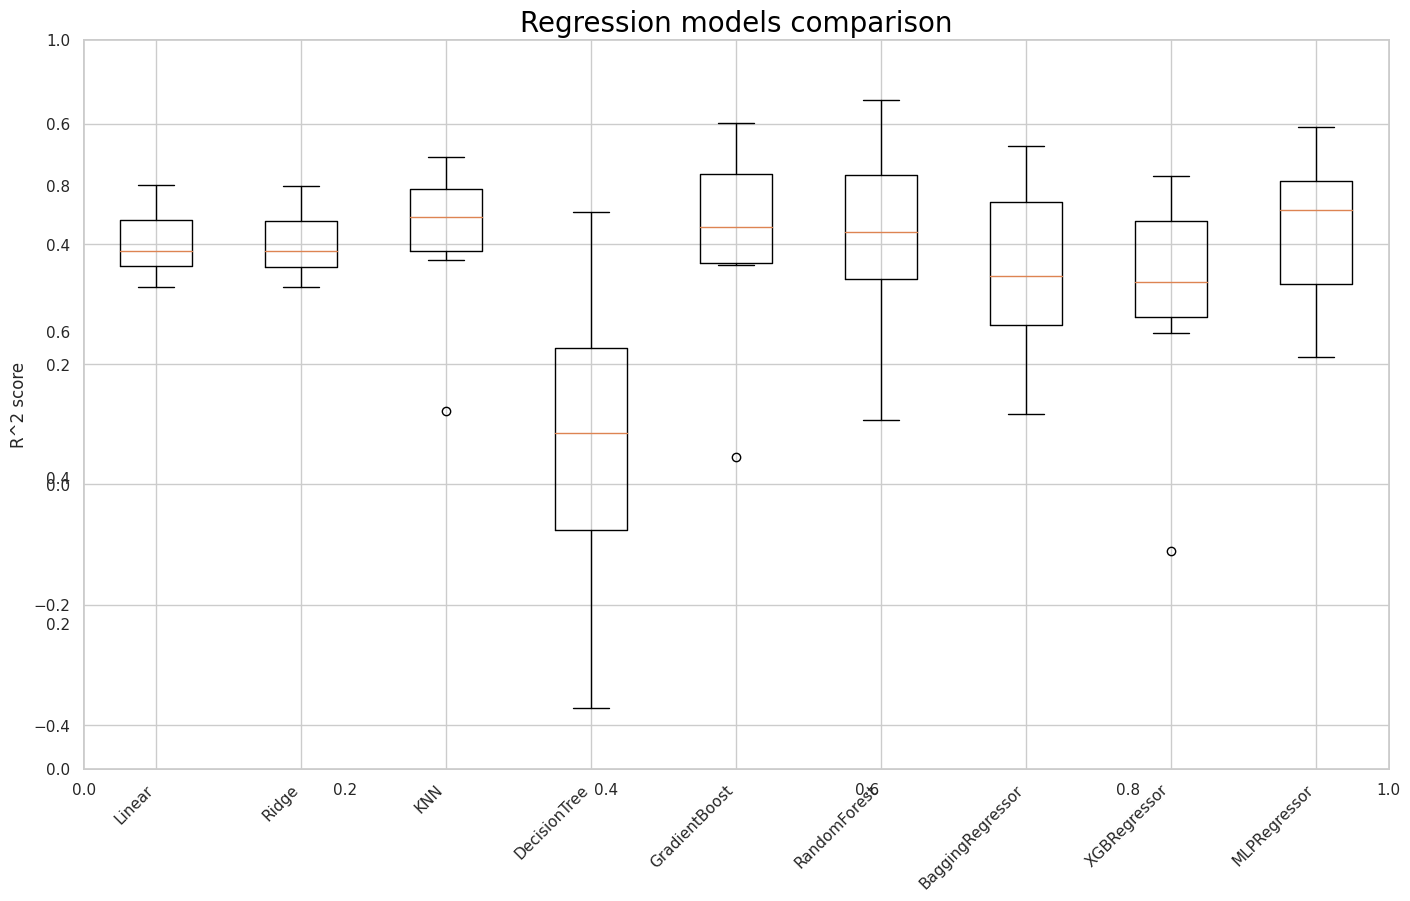

In [ ]:
# BOXPLOT PARA COMPARAR R cuadrado


def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid', )
  figure = plt.figure()
  plt.title('Regression models comparison', color = 'black', fontsize = 20)
  axis = figure.add_subplot(111)
  plt.boxplot(model_results)
  axis.set_xticklabels(model_names, rotation = 45, ha="right")
  axis.set_ylabel("R^2 score")
  plt.margins(0.05, 0.1)

box_compare()

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer

scoring = make_scorer(mean_squared_error, greater_is_better=False)
model_results = []
model_names = []

for model_name in models:
    model = models[model_name]
    tscv = TimeSeriesSplit(n_splits=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring=scoring)
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, -cv_results.mean(), cv_results.std()))

Linear: 12.291562367419088, (0.7108073678620709)
Ridge: 12.916435692335972, (0.9979559723242954)
KNN: 10.329981367043072, (1.766652220056271)
DecisionTree: 5.011915394757975, (1.4637255520680361)
GradientBoost: 3.0025518833705185, (0.7129102364880447)
RandomForest: 2.8636292294052055, (0.9225900075521)
BaggingRegressor: 3.011460805475321, (0.9198671351547689)
XGBRegressor: 3.46762406817919, (1.1103186122483828)
MLPRegressor: 7.178315464783678, (4.256158517573758)


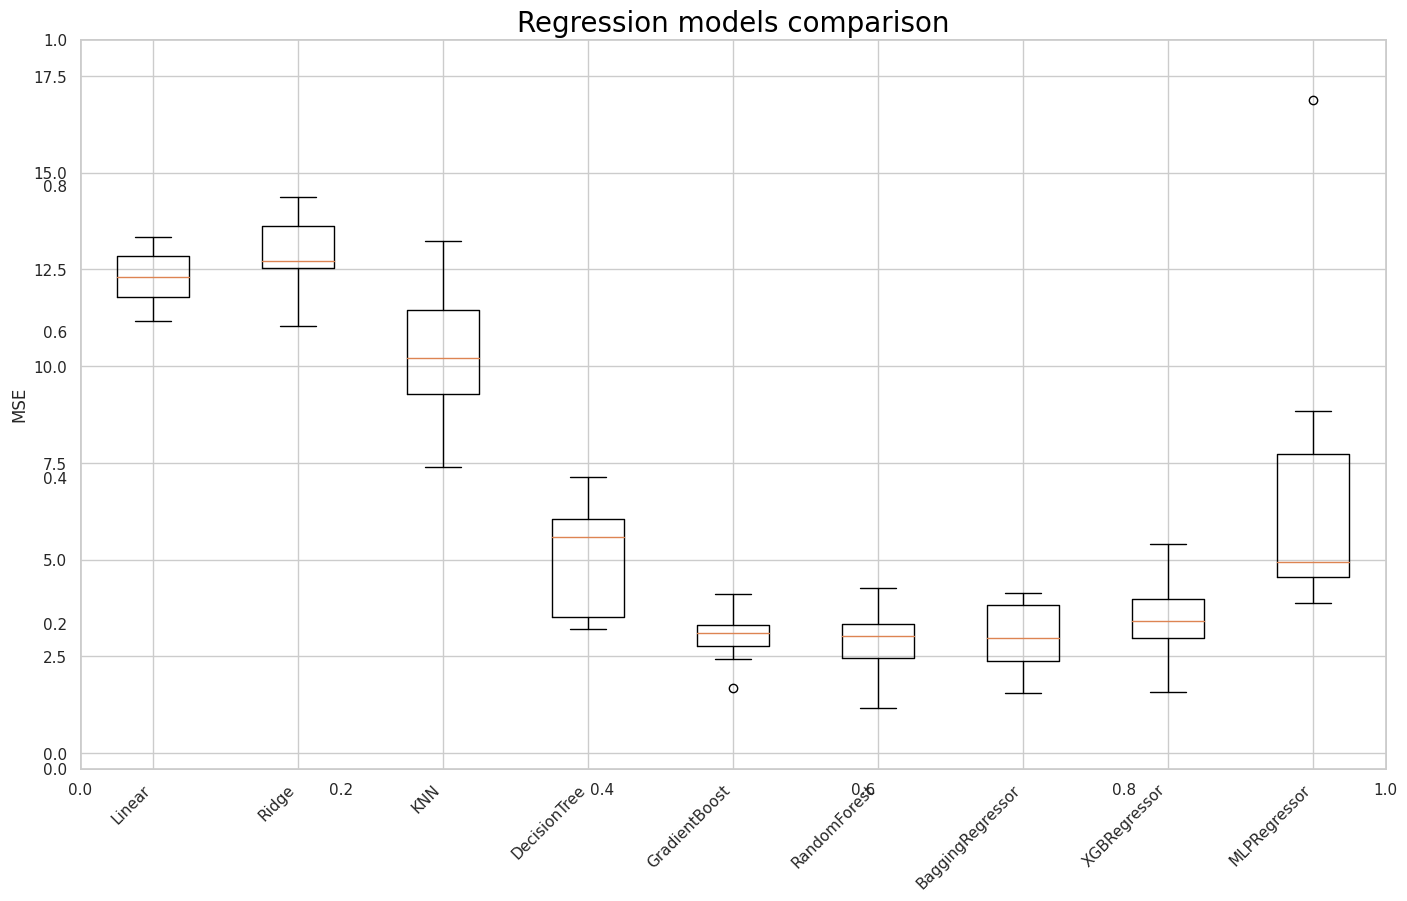

In [ ]:
# BOXPLOT PARA COMPARAR MSE


def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid')
  figure = plt.figure()
  plt.title('Regression models comparison', color='black', fontsize=20)
  axis = figure.add_subplot(111)
  # Convert negative MSE results to positive
  mse_results = [-result for result in model_results]
  plt.boxplot(mse_results)
  axis.set_xticklabels(model_names, rotation=45, ha="right")
  axis.set_ylabel("MSE")
  plt.margins(0.05, 0.1)

box_compare()

## Análisis de Regresión con Multi Layer Percepton

In [ ]:
# Create an MLP Regressor model  
mlpr = MLPRegressor(max_iter=500, solver = 'lbfgs')

# Train the model using the training sets
mlpr.fit(X_train, y_train)
mlpr

MLPRegressor(max_iter=500, solver='lbfgs')

In [ ]:
y_pred = mlpr.predict(X_test)

In [ ]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, y_pred, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, y_pred), 3)))

RMSE: 2.162
R^2 score: 0.962


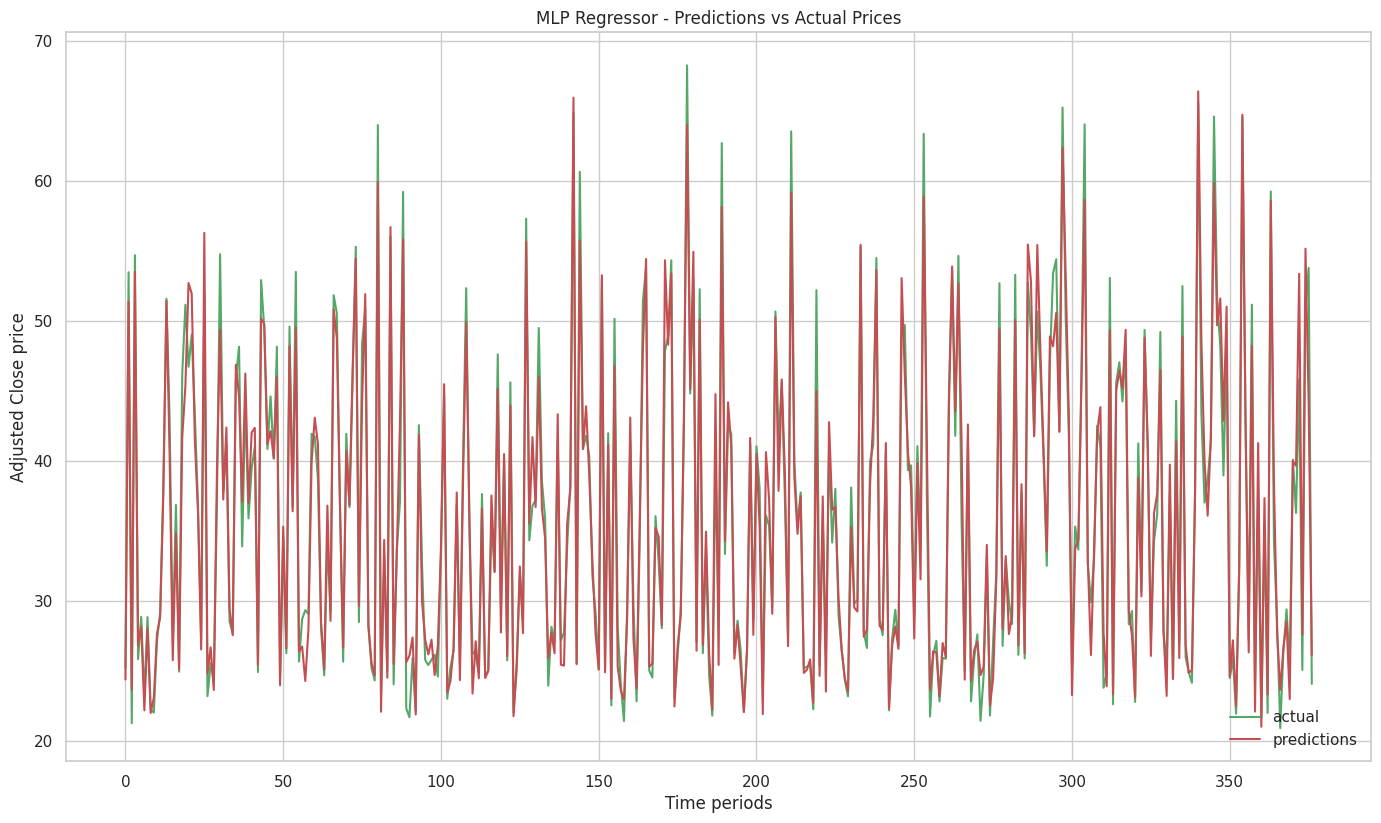

In [ ]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, y_pred.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, y_pred, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
592,25.184267,24.365167
1329,53.460960,51.363929
536,21.246616,23.644291
1727,54.682549,53.503697
338,25.828341,26.814425
...,...,...
1590,45.843021,53.353239
614,25.054287,27.568498
1574,50.866928,55.148069
1366,53.775040,44.137508


In [ ]:
weights = np.abs(mlpr.coefs_[0])

# Calculate feature importances as the sum of the weights across all features
importances = np.sum(weights, axis=0)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Redes Neuronales (LSTM)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
base_final_4 = base_final.copy()
base_final_4=base_final_4.drop(['ticker','date','company_name'],axis=1)
base_final_4

,volume,score,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,MA200,MA300,macd,signal,rsi
1,867,0.112948,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,21.977452,27.222798,26.811366,26.400830,-0.828507,-0.369100,53.086170
4,1147,0.161437,27.072500,27.162500,26.352501,26.562500,23.840668,257142000.0,25.896230,23.936841,26.633268,26.358892,-0.759469,-0.380874,52.048534
5,1190,0.201946,26.635000,26.857500,26.157499,26.565001,23.842911,263188400.0,25.067123,25.438677,26.852919,26.426439,-0.167138,0.155888,51.199745
6,1094,0.155557,26.799999,27.049999,26.674999,26.937500,24.177240,160423600.0,19.450266,24.235195,26.508223,26.256669,-1.720431,-0.992612,53.761358
7,1495,0.176046,27.307501,28.037500,27.174999,27.972500,25.106188,237458000.0,32.164047,25.807157,26.803957,26.404157,0.804958,0.195225,51.868682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,595,0.218955,70.132500,71.062500,70.092499,71.000000,69.355141,98572000.0,108.582402,82.355184,79.206381,76.758286,2.287385,1.974959,48.969172
1811,352,0.275088,71.172501,71.222504,70.730003,71.067497,69.421059,48478800.0,82.687201,82.688601,78.801382,76.745905,0.556570,-0.660179,50.021611
1813,691,0.225388,71.205002,72.495003,71.175003,72.477501,70.798409,93121200.0,105.523000,81.155150,79.162008,77.065846,2.311259,1.611494,49.382496
1814,381,0.218814,72.779999,73.492500,72.029999,72.449997,70.771538,146266000.0,84.227000,82.009933,79.219089,77.335980,-2.052380,-0.004111,50.491038


In [ ]:
X = base_final_4.drop(['Adj Close'], 1)
y = base_final_4['Adj Close']

In [ ]:
# aplicar scaler para los algoritmos de regresión (algunos como MLP son muy sensibles)
scaler = RobustScaler()

# Apply the scaling to X
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled X values
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X = X_scaled_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Build model - LSTM with 50 neurons and 4 hidden layers  

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
14/14 [==============================] - 8s 29ms/step - loss: 1448.1521
Epoch 2/100
14/14 [==============================] - 0s 31ms/step - loss: 1155.5270
Epoch 3/100
14/14 [==============================] - 0s 32ms/step - loss: 911.2182
Epoch 4/100
14/14 [==============================] - 0s 30ms/step - loss: 824.2032
Epoch 5/100
14/14 [==============================] - 0s 30ms/step - loss: 772.2050
Epoch 6/100
14/14 [==============================] - 0s 30ms/step - loss: 729.8853
Epoch 7/100
14/14 [==============================] - 0s 29ms/step - loss: 688.4153
Epoch 8/100
14/14 [==============================] - 0s 30ms/step - loss: 660.5344
Epoch 9/100
14/14 [==============================] - 0s 31ms/step - loss: 630.3984
Epoch 10/100
14/14 [==============================] - 0s 31ms/step - loss: 596.4958
Epoch 11/100
14/14 [==============================] - 0s 33ms/step - loss: 574.7064
Epoch 12/100
14/14 [==============================] - 0s 31ms/step - loss: 547.1451